In https://www.bogleheads.org/forum/viewtopic.php?f=10&t=192105&start=200#p2986911
longinvest said, "It would be quite interesting to see the portfolio and withdrawal
trajectory of 30/70, 40/60, and maybe 50/50 (stocks/bonds) constant AA portfolios vs
Prime Harvesting in both nominal and inflation-adjusted term, and look at the result
with the eye of a retiree who sees nominal numbers on his bank account and mutual fund
statements.

So let's try to do that.

In [1]:
%matplotlib inline
from decimal import Decimal
import itertools
from pprint import pprint

import metrics
from simulate import simulate_withdrawals
import harvesting
import market
import plot
from plot import plt
from withdrawal import VPW

In [2]:
series = market.Returns_US_1871()

In [3]:
def test_all(year):
    results = {}
    for h in (harvesting.N_30_RebalanceHarvesting,
              harvesting.N_40_RebalanceHarvesting,
              harvesting.N_50_RebalanceHarvesting,
#              harvesting.AltPrimeHarvesting,
              harvesting.PrimeHarvesting
        ):
        x = simulate_withdrawals(series.iter_from(year), withdraw=VPW, years=25, harvesting=h)
        results[h.__name__] = x
    return results

In [4]:
def compare_year(year, lens, title):
    results = test_all(year)
    
    fig, ax = plt.subplots()
    if '%' not in title:
        plot.format_axis_labels_with_commas(ax.get_yaxis())
    plt.xlabel('Year of Retirement')
    plt.title('Retirement in Year %s (%s)' % (year, title))

    for strategy in (sorted(results.keys())):
        ax_n = fig.add_subplot(111, sharex=ax, sharey=ax)
        ws = [lens(n) for n in results[strategy]]
        ax_n.plot(ws, label=strategy)
    plt.legend(loc=0)
    plt.show()

In [14]:
def all(year):
    compare_year(year, lambda x: x.portfolio_stocks/x.portfolio_n*100, "Stock %")
    compare_year(year, lambda x: x.portfolio_n, "Portfolio (Nominal)")
    compare_year(year, lambda x: x.portfolio_r, "Portfolio (Real)")
    compare_year(year, lambda x: x.withdraw_n, "Withdrawals (Nominal)")
    compare_year(year, lambda x: x.withdraw_r, "Withdrawals (Real)")

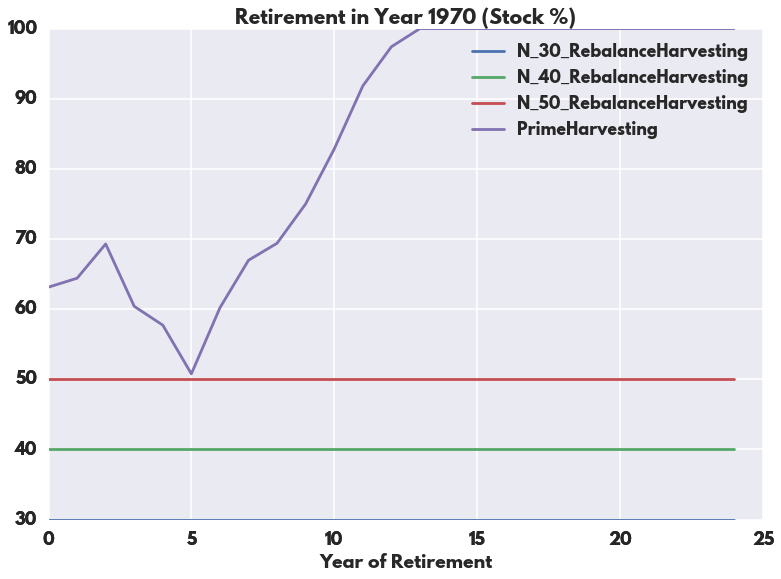

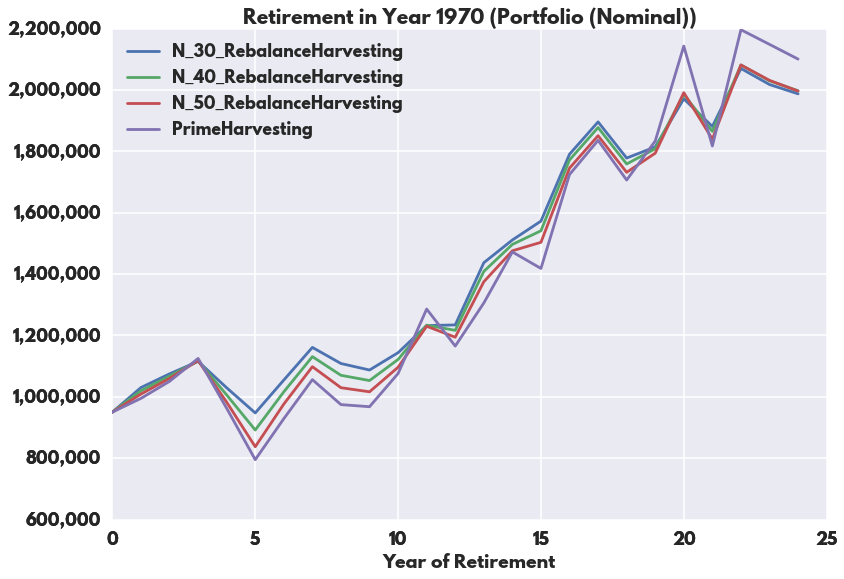

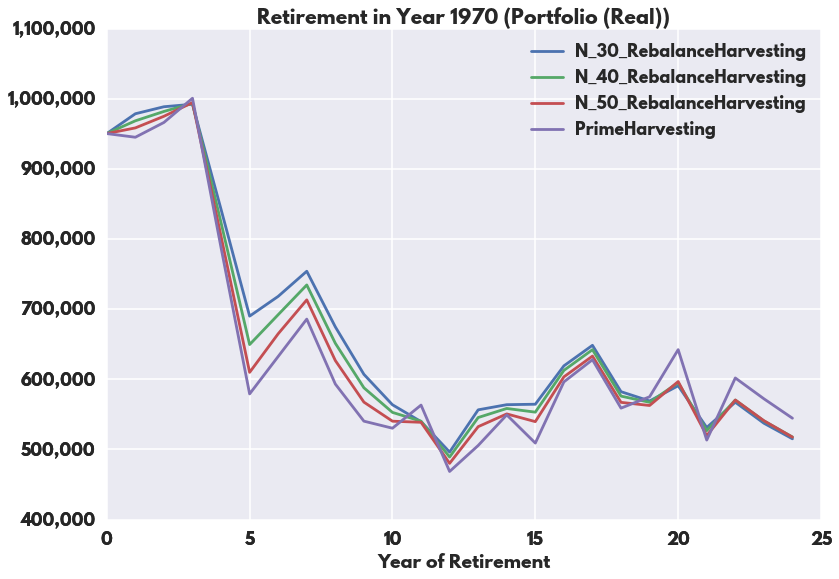

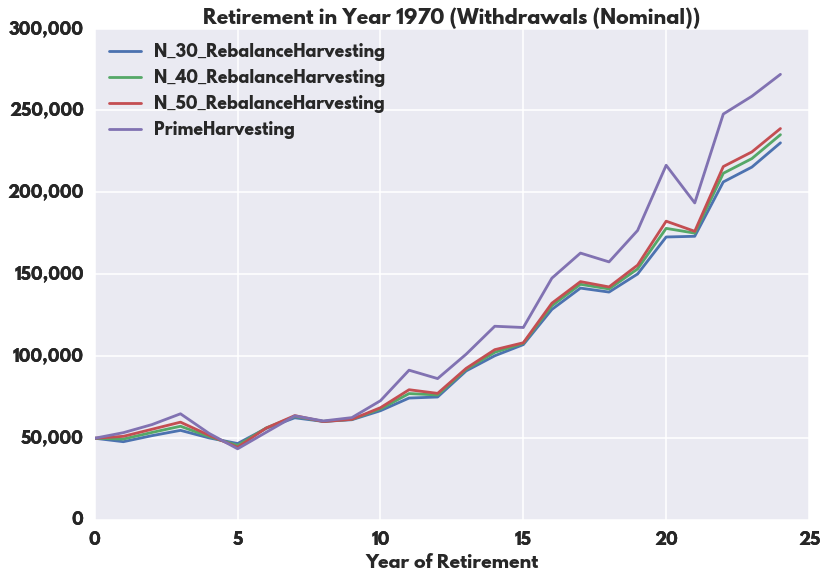

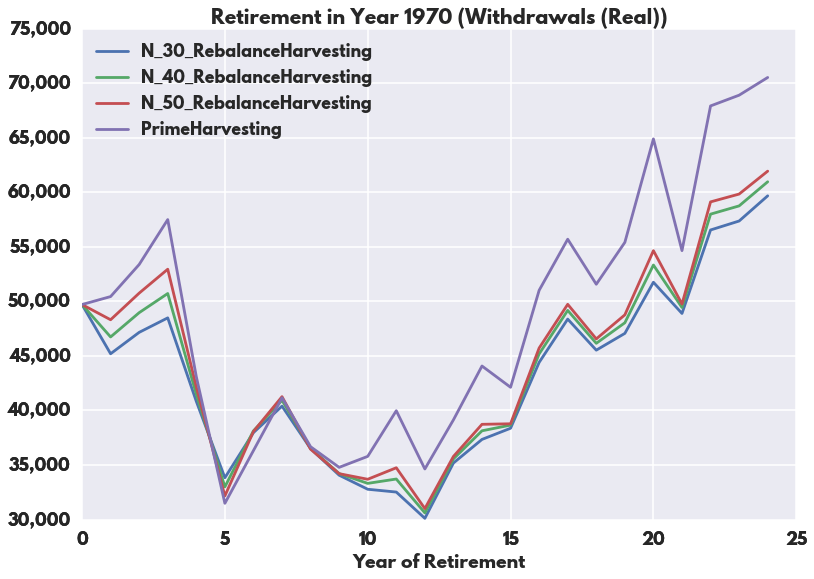

In [15]:
all(1970)